# Adj matrices from Dalin Zhang.

In [2]:
from graph_utils import compute_adj_matrices
import seaborn as sns
import networkx as nx
import mne
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fname = os.path.join('dataset/physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf')
raw = mne.io.read_raw_edf(fname, preload=True, verbose=False)
mne.datasets.eegbci.standardize(raw)  # set channel names
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

montage = raw.get_montage()
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

pos = mne.viz.topomap._find_topomap_coords(raw.info, picks)

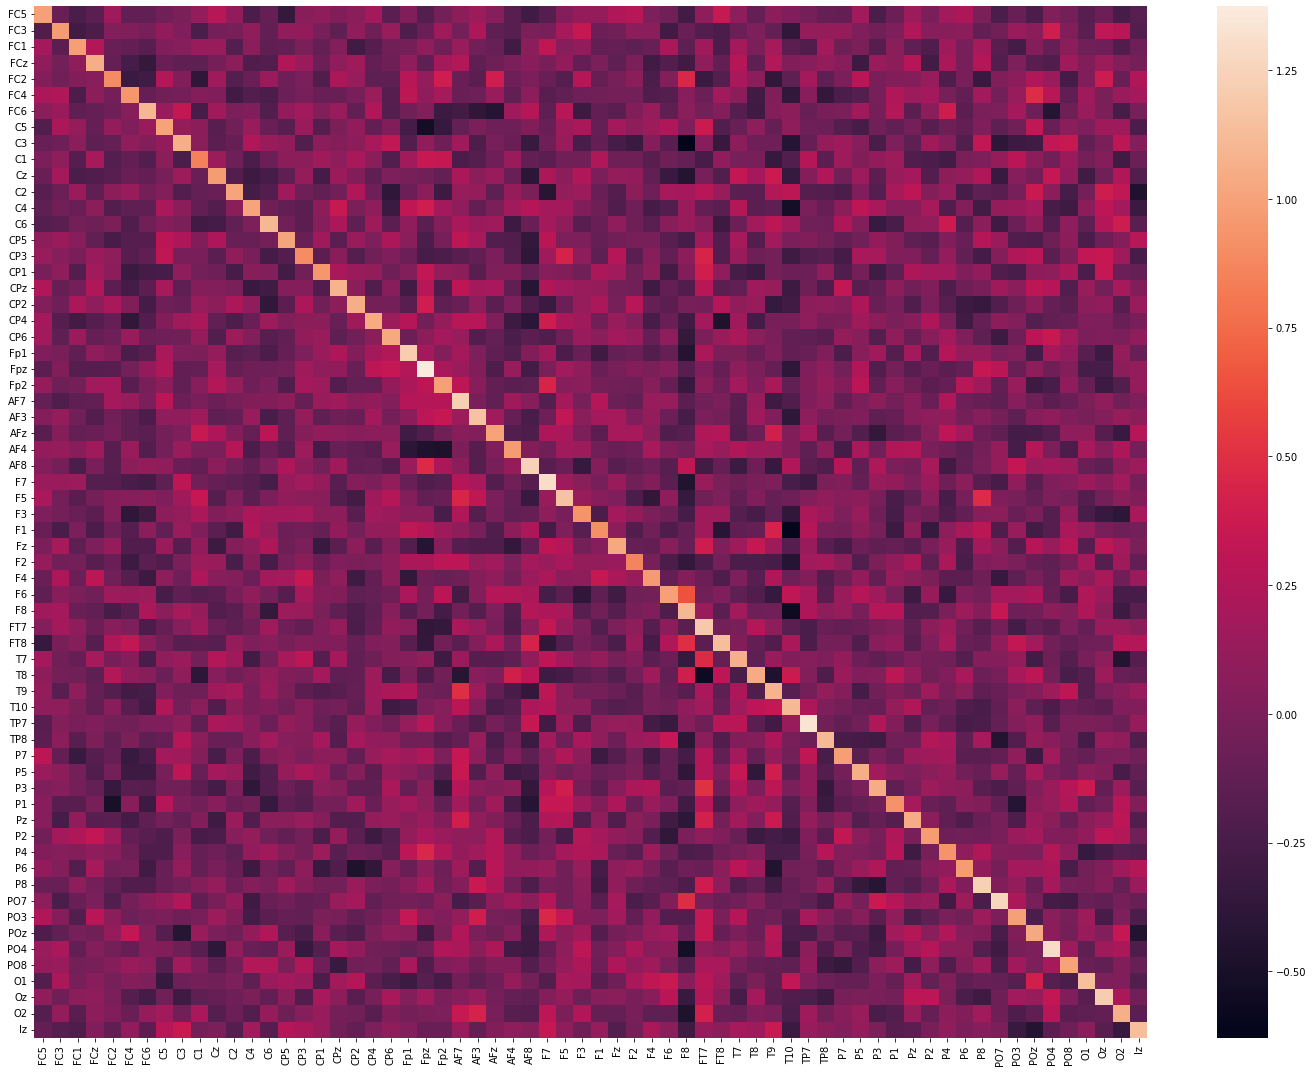

In [3]:
# visualize trained adj
import pickle
adj = pickle.load(open('./output/trained_adj.pickle', 'rb'))

plt.figure(figsize=(20, 15))
sns.heatmap(adj, fmt='g', xticklabels=raw.info['ch_names'], yticklabels=raw.info['ch_names'])
plt.tight_layout()
plt.savefig('images/trained_adj.png')
plt.show()
# plt.clf()
# plt.close()

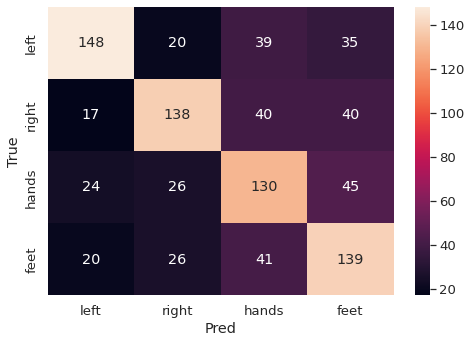

In [4]:
cm = [[148, 20, 39, 35],
[17, 138, 40, 40],
[24, 26, 130, 45],
[20, 26, 41, 139]]

plt.figure(figsize=(7, 5))
labels = ['left', 'right', 'hands', 'feet']
# cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('True')
plt.xlabel('Pred')
plt.tight_layout()
plt.savefig('./images/gcram_cm_best.png')
plt.show()
plt.clf()
plt.close()

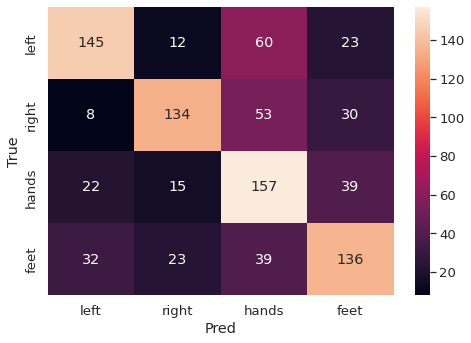

In [5]:
cm = [[145, 12, 60, 23],
[8, 134, 53, 30],
[22, 15, 157, 39],
[32, 23, 39, 136]]

plt.figure(figsize=(7, 5))
labels = ['left', 'right', 'hands', 'feet']
# cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('True')
plt.xlabel('Pred')
plt.tight_layout()
plt.savefig('./images/autogcram_cm_best.png')
plt.show()
plt.clf()
plt.close()

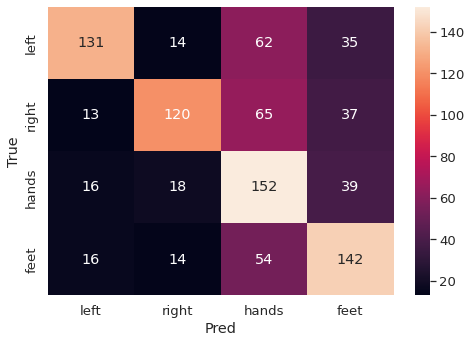

In [6]:
cm = [[131, 14, 62, 35],
[13, 120, 65, 37],
[16, 18, 152, 39],
[16, 14, 54, 142]]

plt.figure(figsize=(7, 5))
labels = ['left', 'right', 'hands', 'feet']
# cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('True')
plt.xlabel('Pred')
plt.tight_layout()
plt.savefig('./images/autogcn_cm_best.png')
plt.show()
plt.clf()
plt.close()

In [4]:
fname = os.path.join('dataset/physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf')
raw = mne.io.read_raw_edf(fname, preload=True, verbose=False)
mne.datasets.eegbci.standardize(raw)  # set channel names
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

montage = raw.get_montage()
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

pos = mne.viz.topomap._find_topomap_coords(raw.info, picks)

Using matplotlib as 2D backend.


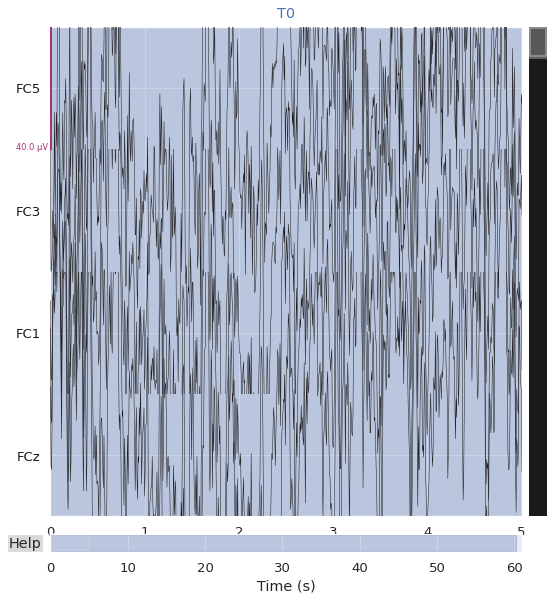

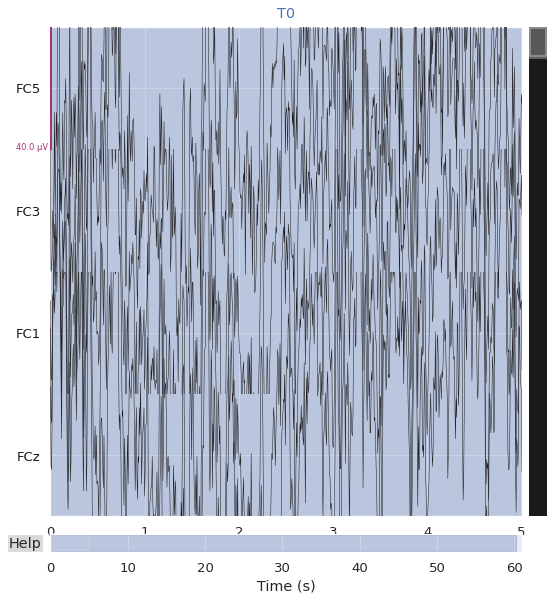

In [8]:
raw.plot(n_channels=4, start=0, duration=5)

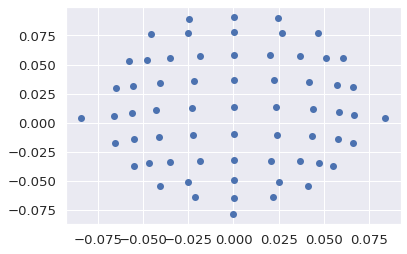

In [9]:
plt.scatter(pos[:, 0], pos[:, 1], picker=True, clip_on=False, s=25, lw=2)
plt.show()

In [10]:
n_adj = compute_adj_matrices('n')
d_adj = compute_adj_matrices('d')
s_adj = compute_adj_matrices('s')

In [11]:
n_G = nx.from_numpy_array(n_adj)
d_G = nx.from_numpy_array(d_adj)
s_G = nx.from_numpy_array(s_adj)

In [8]:
ch_map = {i: raw.ch_names[i] for i in range(len(raw.ch_names))}

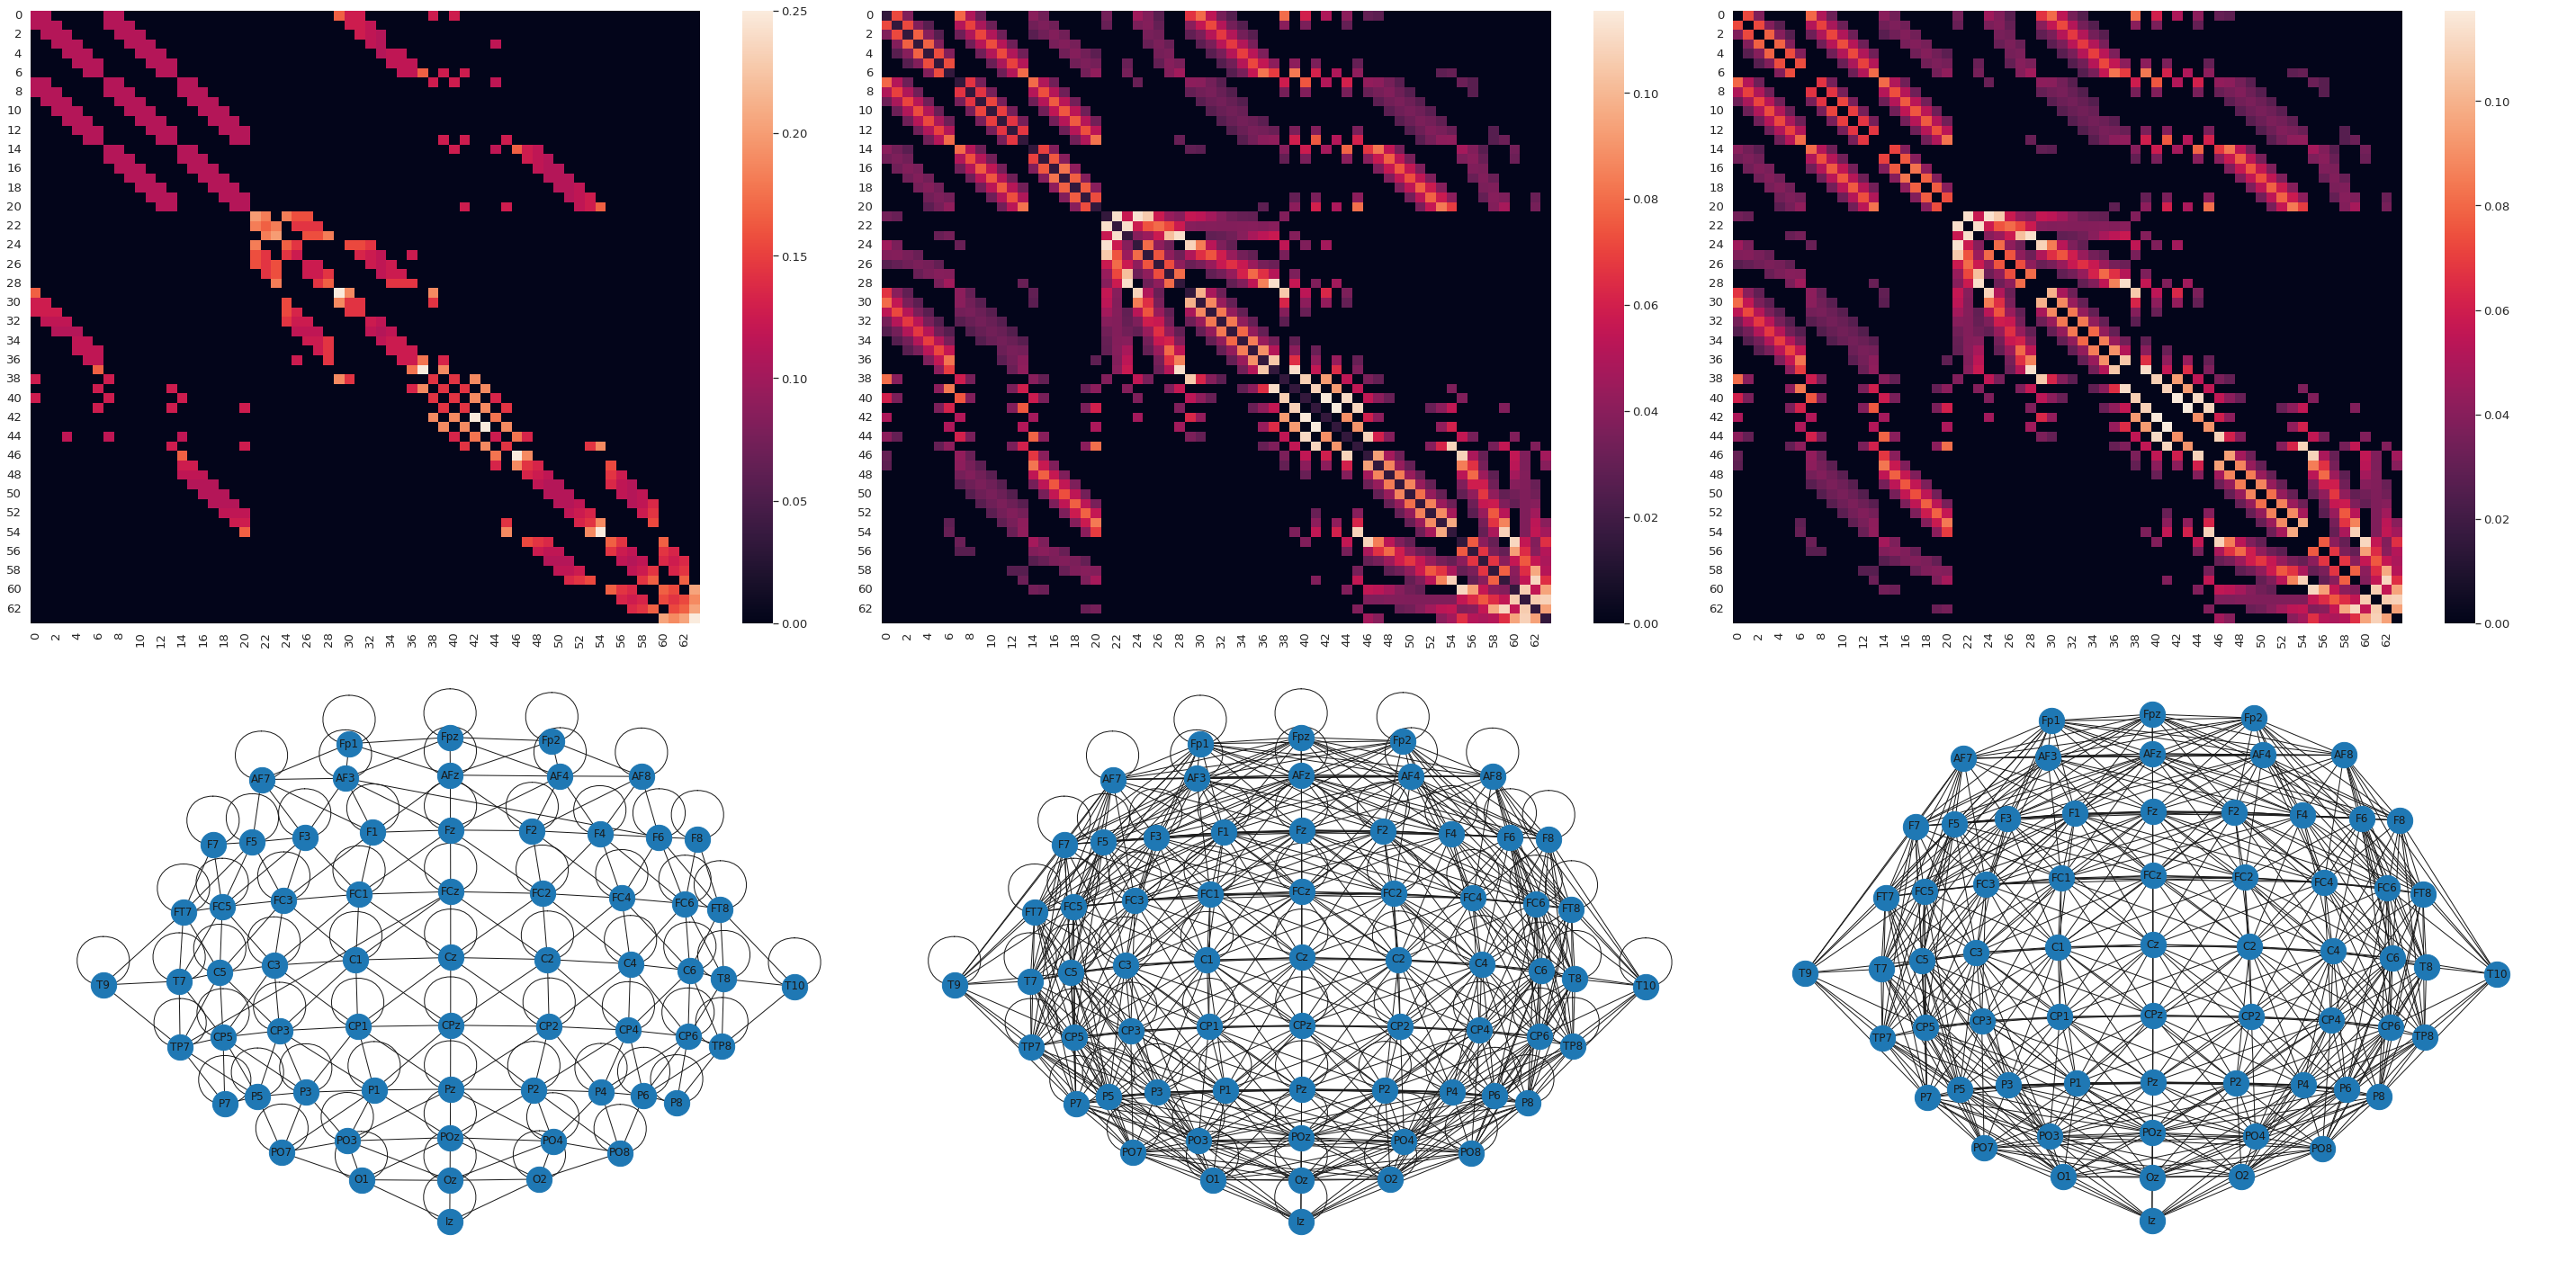

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(40, 20))
sns.heatmap(n_adj, ax=axs[0][0])
sns.heatmap(d_adj, ax=axs[0][1])
sns.heatmap(s_adj, ax=axs[0][2])
nx.draw(n_G, pos=pos, with_labels=True, labels=ch_map, node_size=800, ax=axs[1][0])
nx.draw(d_G, pos=pos, with_labels=True, labels=ch_map, node_size=800, ax=axs[1][1])
nx.draw(s_G, pos=pos, with_labels=True, labels=ch_map, node_size=800, ax=axs[1][2])
plt.tight_layout()
plt.savefig('./images/prevwork_adjs')
plt.show()

# Final results

In [38]:
def adj2edgelist(adj):
    edge_list = []
    for u in range(len(adj)):
        for v in range(len(adj)):
            if adj[u, v] == 0:
                continue
            elif adj[u, v] < 0:
                edge_list.append([u, v, 'r', adj[u, v]])
            else:
                edge_list.append([u, v, 'b', adj[u, v]])
    return edge_list

def plot_adj_as_graph(adj_mat, threshold, pos, show_edge_labels, fname):
    np.fill_diagonal(adj_mat, 0)
    adj_mat = np.where(abs(adj_mat) > threshold, adj_mat, 0)
    adj_mat = np.round(adj_mat, 2)
    edge_list = adj2edgelist(adj_mat)

    G = nx.DiGraph()
    for (u, v, color, weight) in edge_list:
        G.add_edge(u, v, color=color, weight=weight)

    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    weights = [G[u][v]['weight']*5 for u,v in edges]

    edge_labels = nx.get_edge_attributes(G,'weight')

    plt.figure(figsize=(10, 7))
    # G = nx.relabel_nodes(G, ch_map)
    nx.draw(G, pos=pos, with_labels=True, labels=ch_map, node_size=600, edge_color=colors, width=weights)
    # nx.draw(G, pos=pos, with_labels=True, node_size=600, edge_color=colors, width=weights)
    if show_edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f'Threshold: {threshold}')
    plt.xlim(-0.1, 0.1)
    plt.ylim(-0.1, 0.1)
    # plt.tight_layout()
    plt.savefig(f'./images/{fname}')
    plt.show()
    return G

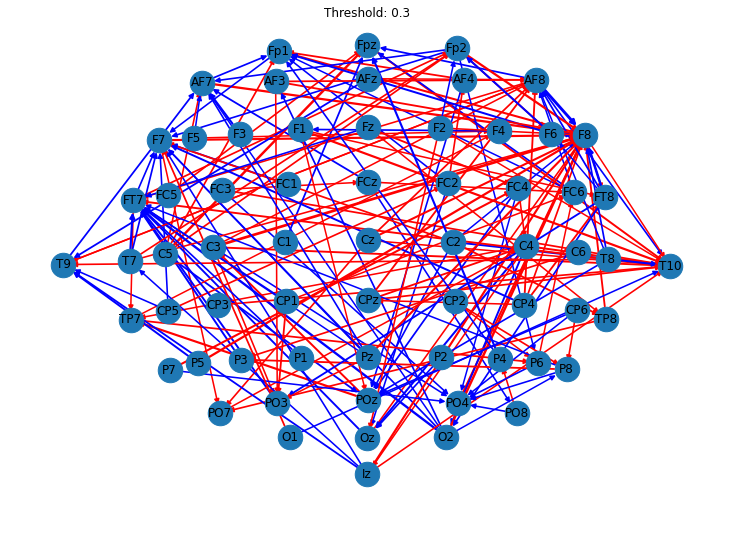

In [39]:
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


adj = pickle.load(open('/home/amar/Desktop/output_all_subjects_new_final/imagine_gcram_auto/cross_subject_data_2_new/688933/trained_adj.pickle', 'rb'))
pos = mne.viz.topomap._find_topomap_coords(raw.info, picks)

threshold = 0.3
fname = f'autogcram_ec-{threshold}.png'
G = plot_adj_as_graph(adj, threshold, pos, show_edge_labels=False, fname=fname)

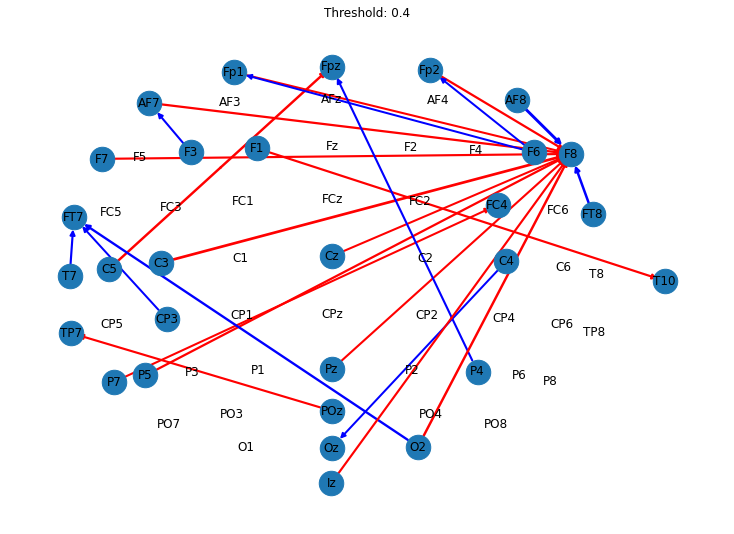

In [13]:
G = plot_adj_as_graph(adj, 0.40, pos, show_edge_labels=False, fname='autogcn_ec2.png')
G_strong = nx.strongly_connected_components(G)

In [36]:
largest = max(nx.strongly_connected_components(G))

In [38]:
for i in nx.strongly_connected_components(G):
    print(i)

{43}
{22}
{0}
{6, 8, 12, 21, 23, 24, 25, 28, 29, 32, 35, 36, 37, 38, 39, 40, 42, 44, 48, 53, 54, 55, 56, 57, 58, 61, 62, 63}
{52}
{59}
{3}
{1}
{2}
{27}
{4}
{5}
{7}
{9}
{10}
{45}
{11}
{13}
{14}
{15}
{16}
{17}
{18}
{19}
{20}
{26}
{30}
{31}
{33}
{34}
{41}
{46}
{47}
{49}
{50}
{51}
{60}
